In [1]:
# Import all the packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection, preprocessing, ensemble, metrics, linear_model
# , naive_bayes, metrics, svm, decomposition
from sklearn.preprocessing import MinMaxScaler
print(os.listdir("./ieee-fraud-detection/"))

Using TensorFlow backend.
/Users/sankalpsachan/anaconda/envs/sirajw1/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sankalpsachan/anaconda/envs/sirajw1/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sankalpsachan/anaconda/envs/sirajw1/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

['test_transaction.csv', '.DS_Store', 'train_identity.csv', 'test_identity.csv', 'sample_submission.csv', 'train_transaction.csv']


/Users/sankalpsachan/anaconda/envs/sirajw1/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sankalpsachan/anaconda/envs/sirajw1/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sankalpsachan/anaconda/envs/sirajw1/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
# Read the test and train data
train_identity = pd.read_csv('./ieee-fraud-detection/train_identity.csv')
train_transaction = pd.read_csv('./ieee-fraud-detection/train_transaction.csv')
test_identity = pd.read_csv('./ieee-fraud-detection/test_identity.csv')
test_transaction = pd.read_csv('./ieee-fraud-detection/test_transaction.csv')

In [3]:
# Check the shape of dataframe
print(train_transaction.shape, train_identity.shape)

(590540, 394) (144233, 41)


In [4]:
# Number of Fraud and non fraud values in training data
train_transaction.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [5]:
# Columns in Training Transaction file
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [6]:
# Columns in Training Identify file
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [7]:
# Columns in test Transaction file
test_transaction.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=393)

In [8]:
# Columns in test Transaction file
test_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [9]:
#Merging both the files on the basis of TransactionID column
X_train = pd.merge(train_transaction,train_identity, on='TransactionID', how='left',left_index=True,right_index=True)
X_test = pd.merge(test_transaction,test_identity, on='TransactionID', how='left',left_index=True,right_index=True)

In [10]:
X_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [11]:
X_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [12]:
# The amount of null values present in all the features and its data type
for i in X_train.columns:
    print(i,'NaN values present is:',X_train[i].isnull().sum(),end=" ")
    print('type is :',X_train[i].dtypes,end=" ")
    print('% of NaN values:',np.round(X_train[i].isnull().sum()/X_train.shape[0]*100,2))

TransactionID NaN values present is: 0 type is : int64 % of NaN values: 0.0
isFraud NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionDT NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionAmt NaN values present is: 0 type is : float64 % of NaN values: 0.0
ProductCD NaN values present is: 0 type is : object % of NaN values: 0.0
card1 NaN values present is: 0 type is : int64 % of NaN values: 0.0
card2 NaN values present is: 8933 type is : float64 % of NaN values: 1.51
card3 NaN values present is: 1565 type is : float64 % of NaN values: 0.27
card4 NaN values present is: 1577 type is : object % of NaN values: 0.27
card5 NaN values present is: 4259 type is : float64 % of NaN values: 0.72
card6 NaN values present is: 1571 type is : object % of NaN values: 0.27
addr1 NaN values present is: 65706 type is : float64 % of NaN values: 11.13
addr2 NaN values present is: 65706 type is : float64 % of NaN values: 11.13
dist1 NaN values present is: 352271 ty

V62 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V63 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V64 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V65 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V66 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V67 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V68 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V69 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V70 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V71 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V72 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V73 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V74 NaN values present is: 77096 type is : float64 % of NaN values: 13.06
V75 NaN values present is: 89164 type 

V183 NaN values present is: 450909 type is : float64 % of NaN values: 76.36
V184 NaN values present is: 450721 type is : float64 % of NaN values: 76.32
V185 NaN values present is: 450721 type is : float64 % of NaN values: 76.32
V186 NaN values present is: 450909 type is : float64 % of NaN values: 76.36
V187 NaN values present is: 450909 type is : float64 % of NaN values: 76.36
V188 NaN values present is: 450721 type is : float64 % of NaN values: 76.32
V189 NaN values present is: 450721 type is : float64 % of NaN values: 76.32
V190 NaN values present is: 450909 type is : float64 % of NaN values: 76.36
V191 NaN values present is: 450909 type is : float64 % of NaN values: 76.36
V192 NaN values present is: 450909 type is : float64 % of NaN values: 76.36
V193 NaN values present is: 450909 type is : float64 % of NaN values: 76.36
V194 NaN values present is: 450721 type is : float64 % of NaN values: 76.32
V195 NaN values present is: 450721 type is : float64 % of NaN values: 76.32
V196 NaN val

V294 NaN values present is: 12 type is : float64 % of NaN values: 0.0
V295 NaN values present is: 12 type is : float64 % of NaN values: 0.0
V296 NaN values present is: 1269 type is : float64 % of NaN values: 0.21
V297 NaN values present is: 12 type is : float64 % of NaN values: 0.0
V298 NaN values present is: 12 type is : float64 % of NaN values: 0.0
V299 NaN values present is: 12 type is : float64 % of NaN values: 0.0
V300 NaN values present is: 1269 type is : float64 % of NaN values: 0.21
V301 NaN values present is: 1269 type is : float64 % of NaN values: 0.21
V302 NaN values present is: 12 type is : float64 % of NaN values: 0.0
V303 NaN values present is: 12 type is : float64 % of NaN values: 0.0
V304 NaN values present is: 12 type is : float64 % of NaN values: 0.0
V305 NaN values present is: 12 type is : float64 % of NaN values: 0.0
V306 NaN values present is: 12 type is : float64 % of NaN values: 0.0
V307 NaN values present is: 12 type is : float64 % of NaN values: 0.0
V308 NaN va

In [13]:
# The distribution of fraud labels,It shows that 96.5% of data contains legit transaction 
# where as only 3.5% are fraud
print('From total data ',np.round(X_train[X_train['isFraud']==1].shape[0]/X_train.shape[0]*100,2),'% contains fraud')
print('From total data ',np.round(X_train[X_train['isFraud']==0].shape[0]/X_train.shape[0]*100,2),'% contains legit')

From total data  3.5 % contains fraud
From total data  96.5 % contains legit


/Users/sankalpsachan/anaconda/envs/sirajw1/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


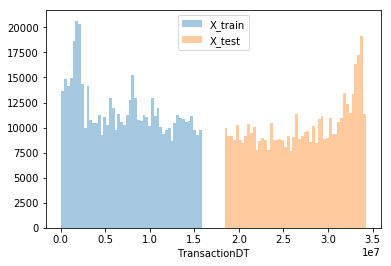

In [14]:
# One of the important features in this dataset is TransactionDT.
# This is a time related feature and the time is in second.
# Let’s see how this feature behaves in train set and test set.Plotting the distribution plot of TransactionDT:
sns.distplot(X_train['TransactionDT'],kde=False)
sns.distplot(X_test['TransactionDT'],kde=False)
plt.legend(['X_train','X_test'])
plt.show()

In [15]:
# From this feature we will create 2 new features.
# Since this is in sec ,one feature will be in day and another feature will be in hour.

#First creating day feature
X_train['day'] = (X_train['TransactionDT']//(3600*24)-1)%7
X_test['day'] = (X_test['TransactionDT']//(3600*24)-1)%7
#Then creating hour feature
X_train['hour'] = (X_train['TransactionDT']//(3600))%24
X_test['hour'] = (X_test['TransactionDT']//(3600))%24

#train_hour['hour'] = X_train['hour'] 
#train_hour['isFraud'] = X_train['isFraud']

plt.figure(figsize=(18,18))
plt.subplot(3,3,1)
train_hour = (X_train.groupby(['isFraud'])['hour']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('hour'))

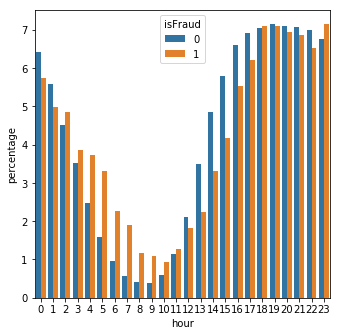

In [16]:
# The new feature ‘hour’ gives a very interesting result.
# From the plot it is confirm that 
# the hour from 4 to 9 rate of fraud transaction is more and from 9 to 18 rate of legit transaction is more.
sns.barplot(x='hour',y='percentage',hue='isFraud',data=train_hour)
plt.show()

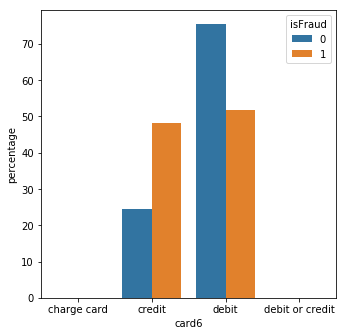

In [17]:
# Another interesting feature is ‘Card6’ feature. 
# This feature tells that wheather the transaction is happened through credit card or debit card or charge card

# One interesting observation is that Credit card holders have higher percentage of frauds then debit card holders

plt.figure(figsize=(18,18))
plt.subplot(3,3,1)
train_card6 = (X_train.groupby(['isFraud'])['card6']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card6'))
sns.barplot(x="card6", y="percentage", hue="isFraud", data=train_card6)
plt.show()

In [18]:
# one of the most important feature is ‘P_emaildomain’ and ‘R_emaildomain’. 
# P_emaildomain refers to the email of the purchaser and R_emaildomain refers to the email of the receiver.
# Lets first analyse this

X_train['P_emaildomain'].value_counts()[:20]

gmail.com        228355
yahoo.com        100934
hotmail.com       45250
anonymous.com     36998
aol.com           28289
comcast.net        7888
icloud.com         6267
outlook.com        5096
msn.com            4092
att.net            4033
live.com           3041
sbcglobal.net      2970
verizon.net        2705
ymail.com          2396
bellsouth.net      1909
yahoo.com.mx       1543
me.com             1522
cox.net            1393
optonline.net      1011
charter.net         816
Name: P_emaildomain, dtype: int64

### Lets first separate first part from second part of the mail.From first part one new feature will be created and from second part another new feature will be created.Some little bit analysis and we can see that second part consist of net,com,de,es,jp,fr,uk,mx,es type of extension.From the first part it consist of msn,hotmail,outlook,gmail,me,icloud etc. All of the first part belongs to some company,like msn,hotmail,outlook belongs to Microsoft then me,icloud belongs to Apple like wise we can categorize these first part

In [19]:
# we will create 2 features one is ‘P_emaildomain_bin’ and another is ‘P_emaildomain_prefix’ in P_emaildomain_bin 
# as we have the company name for that email and for P_emaildomain_prefix we have the extension of that email.
# Similarly for R_emaildomain_perfix and R_emaildomain_bin

emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum',
'scranton.edu': 'other', 'optonline.net': 'other', 'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr'
: 'yahoo', 'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com':
'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink', 
'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other', 
'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'other', 
'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft', 
'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 
'suddenlink.net': 'other', 'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft', 
'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink',
'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 'rocketmail.com': 'yahoo', 
'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 
'mail.com': 'other', 'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 
'cableone.net': 'other', 'hotmail.es': 'microsoft', 'mac.com':
'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com':
'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other', 'aol.com': 'aol', 
'juno.com': 'other', 'icloud.com': 'apple'}
us_emails = ['gmail', 'net', 'edu']
for c in ['P_emaildomain', 'R_emaildomain']:
    X_train[c + '_bin'] = X_train[c].map(emails)
    X_test[c + '_bin'] = X_test[c].map(emails)
    X_train[c + '_suffix'] = X_train[c].map(lambda x: str(x).split('.')[-1])
    X_test[c + '_suffix'] = X_test[c].map(lambda x: str(x).split('.')[-1])
    X_train[c + '_suffix'] = X_train[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    X_test[c + '_suffix'] = X_test[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

In [20]:
# Some arbitrary features interaction
X_train['card1_count_full'] = X_train['card1'].map(pd.concat([X_train['card1'], X_test['card1']], ignore_index=True).value_counts(dropna=False))
X_test['card1_count_full'] = X_test['card1'].map(pd.concat([X_train['card1'], X_test['card1']], ignore_index=True).value_counts(dropna=False))
X_train['card2_count_full'] = X_train['card2'].map(pd.concat([X_train['card2'], X_test['card2']], ignore_index=True).value_counts(dropna=False))
X_test['card2_count_full'] = X_test['card2'].map(pd.concat([X_train['card2'], X_test['card2']], ignore_index=True).value_counts(dropna=False))
X_train['card3_count_full'] = X_train['card3'].map(pd.concat([X_train['card3'], X_test['card3']], ignore_index=True).value_counts(dropna=False))
X_test['card3_count_full'] = X_test['card3'].map(pd.concat([X_train['card3'], X_test['card3']], ignore_index=True).value_counts(dropna=False))
X_train['card4_count_full'] = X_train['card4'].map(pd.concat([X_train['card4'], X_test['card4']], ignore_index=True).value_counts(dropna=False))
X_test['card4_count_full'] = X_test['card4'].map(pd.concat([X_train['card4'], X_test['card4']], ignore_index=True).value_counts(dropna=False))
X_train['card5_count_full'] = X_train['card5'].map(pd.concat([X_train['card5'], X_test['card5']], ignore_index=True).value_counts(dropna=False))
X_test['card5_count_full'] = X_test['card5'].map(pd.concat([X_train['card5'], X_test['card5']], ignore_index=True).value_counts(dropna=False))
X_train['card6_count_full'] = X_train['card6'].map(pd.concat([X_train['card6'], X_test['card6']], ignore_index=True).value_counts(dropna=False))
X_test['card6_count_full'] = X_test['card6'].map(pd.concat([X_train['card6'], X_test['card6']], ignore_index=True).value_counts(dropna=False))
X_train['addr1_count_full'] = X_train['addr1'].map(pd.concat([X_train['addr1'], X_test['addr1']], ignore_index=True).value_counts(dropna=False))
X_test['addr1_count_full'] = X_test['addr1'].map(pd.concat([X_train['addr1'], X_test['addr1']], ignore_index=True).value_counts(dropna=False))
X_train['addr2_count_full'] = X_train['addr2'].map(pd.concat([X_train['addr2'], X_test['addr2']], ignore_index=True).value_counts(dropna=False))
X_test['addr2_count_full'] = X_test['addr2'].map(pd.concat([X_train['addr2'], X_test['addr2']], ignore_index=True).value_counts(dropna=False))
X_train['TransactionAmt_to_mean_card1'] = X_train['TransactionAmt'] / X_train.groupby(['card1'])['TransactionAmt'].transform('mean')
X_train['TransactionAmt_to_mean_card4'] = X_train['TransactionAmt'] / X_train.groupby(['card4'])['TransactionAmt'].transform('mean')
X_train['TransactionAmt_to_std_card1'] = X_train['TransactionAmt'] / X_train.groupby(['card1'])['TransactionAmt'].transform('std')
X_train['TransactionAmt_to_std_card4'] = X_train['TransactionAmt'] / X_train.groupby(['card4'])['TransactionAmt'].transform('std')
X_test['TransactionAmt_to_mean_card1'] = X_test['TransactionAmt'] / X_test.groupby(['card1'])['TransactionAmt'].transform('mean')
X_test['TransactionAmt_to_mean_card4'] = X_test['TransactionAmt'] / X_test.groupby(['card4'])['TransactionAmt'].transform('mean')
X_test['TransactionAmt_to_std_card1'] = X_test['TransactionAmt'] / X_test.groupby(['card1'])['TransactionAmt'].transform('std')
X_test['TransactionAmt_to_std_card4'] = X_test['TransactionAmt'] / X_test.groupby(['card4'])['TransactionAmt'].transform('std')
X_train['id_02_to_mean_card1'] = X_train['id_02'] / X_train.groupby(['card1'])['id_02'].transform('mean')
X_train['id_02_to_mean_card4'] = X_train['id_02'] / X_train.groupby(['card4'])['id_02'].transform('mean')
X_train['id_02_to_std_card1'] = X_train['id_02'] / X_train.groupby(['card1'])['id_02'].transform('std')
X_train['id_02_to_std_card4'] = X_train['id_02'] / X_train.groupby(['card4'])['id_02'].transform('std')
X_test['id_02_to_mean_card1'] = X_test['id_02'] / X_test.groupby(['card1'])['id_02'].transform('mean')
X_test['id_02_to_mean_card4'] = X_test['id_02'] / X_test.groupby(['card4'])['id_02'].transform('mean')
X_test['id_02_to_std_card1'] = X_test['id_02'] / X_test.groupby(['card1'])['id_02'].transform('std')
X_test['id_02_to_std_card4'] = X_test['id_02'] / X_test.groupby(['card4'])['id_02'].transform('std')
X_train['D15_to_mean_card1'] = X_train['D15'] / X_train.groupby(['card1'])['D15'].transform('mean')
X_train['D15_to_mean_card4'] = X_train['D15'] / X_train.groupby(['card4'])['D15'].transform('mean')
X_train['D15_to_std_card1'] = X_train['D15'] / X_train.groupby(['card1'])['D15'].transform('std')
X_train['D15_to_std_card4'] = X_train['D15'] / X_train.groupby(['card4'])['D15'].transform('std')
X_test['D15_to_mean_card1'] = X_test['D15'] / X_test.groupby(['card1'])['D15'].transform('mean')
X_test['D15_to_mean_card4'] = X_test['D15'] / X_test.groupby(['card4'])['D15'].transform('mean')
X_test['D15_to_std_card1'] = X_test['D15'] / X_test.groupby(['card1'])['D15'].transform('std')
X_test['D15_to_std_card4'] = X_test['D15'] / X_test.groupby(['card4'])['D15'].transform('std')
X_train['D15_to_mean_addr1'] = X_train['D15'] / X_train.groupby(['addr1'])['D15'].transform('mean')
X_train['D15_to_mean_card4'] = X_train['D15'] / X_train.groupby(['card4'])['D15'].transform('mean')
X_train['D15_to_std_addr1'] = X_train['D15'] / X_train.groupby(['addr1'])['D15'].transform('std')
X_train['D15_to_std_card4'] = X_train['D15'] / X_train.groupby(['card4'])['D15'].transform('std')
X_test['D15_to_mean_addr1'] = X_test['D15'] / X_test.groupby(['addr1'])['D15'].transform('mean')
X_test['D15_to_mean_card4'] = X_test['D15'] / X_test.groupby(['card4'])['D15'].transform('mean')
X_test['D15_to_std_addr1'] = X_test['D15'] / X_test.groupby(['addr1'])['D15'].transform('std')
X_test['D15_to_std_card4'] = X_test['D15'] / X_test.groupby(['card4'])['D15'].transform('std')

In [21]:
# label encode the target variable
def encode(dataset):
    encoder = preprocessing.LabelEncoder()

    non_num_cols = [dataset.columns[n] for n, i in enumerate(dataset.dtypes)
                    if i not in ('int64', 'float64')]

    # Filling missing string values with most common value
    for i in non_num_cols:
        dataset[i+'_mod'] = encoder\
            .fit_transform(dataset[i].fillna(dataset[i]
                                             .replace(np.nan, '0', regex=True).mode()[0]))

    col_list = [
        x for x in train_transaction.columns if x not in non_num_cols+['isFraud']]

    #y = dataset['isFraud']

    dataset = dataset[col_list].fillna(0)

    return dataset

In [22]:
# feature engineering
def feature_eng(dataset, y):

    x_train = dataset.fillna(0)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)

    rus = RandomUnderSampler(random_state=42)
    x_train, y = rus.fit_resample(x_train, y)

    return x_train, y

In [23]:
def feature_eng_t(dataset):

    x_train = dataset.fillna(0)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)

    return x_train

In [28]:
def clf(x_train, y_train, x_test):

    RF = ensemble.RandomForestClassifier(n_estimators=32#31
                                       , n_jobs=-1
                                       , max_depth=8#31
                                       , min_samples_split = 0.1#0.3
                                     )

    LR = linear_model.LogisticRegression(n_jobs=-1)

    #RF.fit(x_train, y_train)
    #predictions = RF.predict(x_test)

    LR.fit(x_train, y_train)
    predictions = LR.predict(x_test)

    return predictions

In [29]:
X_train1 = encode(X_train)
X_train1, y = feature_eng(X_train1, X_train['isFraud'])

X_test1 = encode(X_test)
X_test1 = feature_eng_t(X_test1)

predictions = clf(X_train1, y, X_test1)

/Users/sankalpsachan/anaconda/envs/sirajw1/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sankalpsachan/anaconda/envs/sirajw1/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [30]:
output_path = './ieee-fraud-detection/sample_submission.csv'

In [31]:
output = pd.DataFrame()
output['TransactionID'] = X_test['TransactionID']
output['isFraud'] = list(predictions)
output.to_csv(output_path, index=False)